In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn
import sklearn.datasets
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics

In [6]:
#load the iris data set
iris = sklearn.datasets.load_iris()

X = iris.data  
Y = iris.target

print X.shape, Y.shape

(150, 4) (150,)


In [7]:
### Your code here ###

# put test data aside
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, Y, test_size=0.33, random_state=42)

print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(100, 4)
(50, 4)
(100,)
(50,)


In [8]:
## Your code here ###

# use cross validation to find the optimal value for k
k = np.arange(20)+1

parameters = {'n_neighbors': k}
knn = sklearn.neighbors.KNeighborsClassifier()
clf = sklearn.grid_search.GridSearchCV(knn, parameters, cv=10)
clf.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

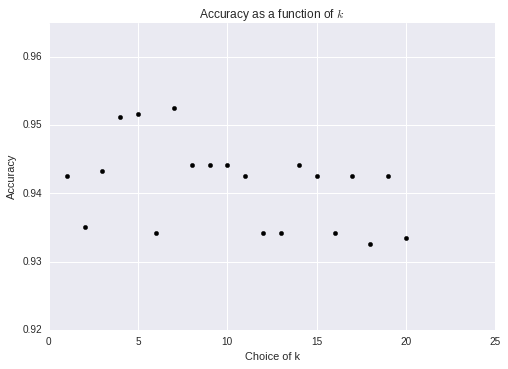

In [9]:
### Your code here ###
a = clf.grid_scores_
scores = [b.cv_validation_scores for b in a]

score_means = np.mean(scores, axis=1)

# sns.boxplot(scores)
plt.scatter(k,score_means, c='k', zorder=2)
# plt.ylim(0.8, 1.1)
plt.title('Accuracy as a function of $k$')
plt.ylabel('Accuracy')
plt.xlabel('Choice of k')
plt.show()

In [10]:
def computeTestScores(test_x, test_y, clf, cv):
    kFolds = sklearn.cross_validation.KFold(test_x.shape[0], n_folds=cv)

    scores = []
    for _, test_index in kFolds:
        test_data = test_x[test_index]
        test_labels = test_y[test_index]
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(test_data)))
    return scores

In [11]:
scores = computeTestScores(test_x = X_test, test_y = Y_test, clf=clf, cv=5)
print np.mean(scores), np.std(scores)

0.98 0.04
